# Up -To -Date Reservoir Forecasting
## A Jupyter Notebook Analyzes Colorado Reservoir Data from USBR in Real Time
### by Chris Lyons

This notebook obtains data directly from a [US Bureau of Reclamation website](https://www.usbr.gov/uc/water/hydrodata/),  calculates the slope of the reservoir decline, and uses Facebook Prophet to analyze the data in real time for the Colorado River Basin.  It also analyzes water consumption using [USGS data](https://www.sciencebase.gov/catalog/item/get/5af3311be4b0da30c1b245d8).  This can run by anyone wishing to know the most accurate and up-to-date information for the region's reservoir water supply and is personally used by me to provide a weekly update of the situation at [Twitter](https://twitter.com/ReservoirChris) and less regular updates at [Tableau](https://public.tableau.com/app/profile/chris.lyons/viz/ColoradoRiverBasinReservoirs/ColoradoRiverBasinReservoirs).  The code should be easily portable to other river basins given that the only differences should be the counties and reservoirs used.

In [1]:
# This is a way to run functions I made in a src file.
# Any time a funcs.name_of_function is used, it requires
# this code to be in place for it to work properly. 


%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.functions as funcs

C:\Users\eincr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# The requests and pandas libraries are being loaded and USBR
# data for Lake Mead water storage is being saved as the the 
# variable name Lake_Mead.  

import requests
import pandas as pd
url1 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/921/csv/17.csv'
r1 = requests.get(url1)
open('mead.csv', "wb").write(r1.content)
Lake_Mead = pd.read_csv('mead.csv')

In [3]:
# This is the last five columns for the Lake Mead dataframe.
# These tails should be inspected to make sure the last date of 
# interest is included for all of the reservoirs as often the last 
# date isn't included for all of them. This is most likely due to
# delayed reporting by the people imputing the data. 
Lake_Mead.tail()

,datetime,storage
31314,2023-02-20,7513412.4
31315,2023-02-21,7498418.4
31316,2023-02-22,7496992.8
31317,2023-02-23,7490577.6
31318,2023-02-24,7485588.0


In [4]:
# This is the same as what was done for Lake Mead.  The same steps 
# have been repeated for every reservoir in the basin.
url2 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/919/csv/17.csv'
r2 = requests.get(url2)
open('powell.csv', "wb").write(r2.content)
Lake_Powell = pd.read_csv('powell.csv')

In [5]:
Lake_Powell.tail()

,datetime,storage
21787,2023-02-20,5353519.18
21788,2023-02-21,5347319.46
21789,2023-02-22,5345629.36
21790,2023-02-23,5341123.98
21791,2023-02-24,5336620.84


In [6]:
url3 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/923/csv/17.csv'
r3 = requests.get(url3)
open('Lake_Havasu.csv', "wb").write(r3.content)
Lake_Havasu = pd.read_csv('Lake_Havasu.csv')

In [7]:
Lake_Havasu.tail()

,datetime,storage
30823,2023-02-20,563292.4
30824,2023-02-21,563179.0
30825,2023-02-22,567752.8
30826,2023-02-23,575898.7
30827,2023-02-24,575180.5


In [8]:
url4 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/922/csv/17.csv'
r4 = requests.get(url4)
open('Lake_Mohave.csv', "wb").write(r4.content)
Lake_Mohave = pd.read_csv('Lake_Mohave.csv')

In [9]:
Lake_Mohave.tail()

,datetime,storage
26681,2023-02-20,1681064.2
26682,2023-02-21,1678033.9
26683,2023-02-22,1683685.0
26684,2023-02-23,1686988.3
26685,2023-02-24,1694441.2


In [10]:
url5 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/3083/csv/17.csv'
r5 = requests.get(url5)
open('Lake_Nighthorse.csv', "wb").write(r5.content)
Lake_Nighthorse = pd.read_csv('Lake_Nighthorse.csv')

In [11]:
Lake_Nighthorse.tail()

,datetime,storage
5004,2023-02-20,113234.47
5005,2023-02-21,113264.06
5006,2023-02-22,113278.86
5007,2023-02-23,113293.66
5008,2023-02-24,113308.46


In [12]:
url6 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/100010/csv/17.csv'
r6 = requests.get(url6)
open('Granby_Reservoir.csv', "wb").write(r6.content)
Granby_Reservoir = pd.read_csv('Granby_Reservoir.csv')

In [13]:
Granby_Reservoir.tail()

,datetime,storage
26105,2023-02-20,431702.7
26106,2023-02-21,430726.2
26107,2023-02-22,429946.0
26108,2023-02-23,428972.5
26109,2023-02-24,427917.4


In [14]:
url7 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/915/csv/17.csv'
r7 = requests.get(url7)
open('Crystal_Reservoir.csv', "wb").write(r7.content)
Crystal_Reservoir = pd.read_csv('Crystal_Reservoir.csv')

In [15]:
Crystal_Reservoir.tail()

,datetime,storage
16780,2023-02-20,14261.48
16781,2023-02-21,14601.75
16782,2023-02-22,15054.10
16783,2023-02-23,15890.42
16784,2023-02-24,16079.26


In [16]:
url8 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/2686/csv/17.csv'
r8 = requests.get(url8)
open('Heron_Reservoir.csv', "wb").write(r8.content)
Heron_Reservoir = pd.read_csv('Heron_Reservoir.csv')

In [17]:
Heron_Reservoir.tail()

,datetime,storage
17583,2023-02-20,37223.0
17584,2023-02-21,37141.0
17585,2023-02-22,37110.0
17586,2023-02-23,37038.0
17587,2023-02-24,36895.0


In [18]:
url9 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/948/csv/17.csv'
r9 = requests.get(url9)
open('Ridgway_Reservoir.csv', "wb").write(r9.content)
Ridgway_Reservoir = pd.read_csv('Ridgway_Reservoir.csv')

In [19]:
Ridgway_Reservoir.tail()

,datetime,storage
13272,2023-02-20,69763.81
13273,2023-02-21,69763.81
13274,2023-02-22,69792.45
13275,2023-02-23,69811.55
13276,2023-02-24,69821.10


In [20]:
url10 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/920/csv/17.csv'
r10 = requests.get(url10)
open('Navajo_Reservoir.csv', "wb").write(r10.content)
Navajo_Reservoir = pd.read_csv('Navajo_Reservoir.csv')

In [21]:
Navajo_Reservoir.tail()

,datetime,storage
22149,2023-02-20,843289.89
22150,2023-02-21,843202.66
22151,2023-02-22,843551.63
22152,2023-02-23,843551.63
22153,2023-02-24,843289.89


In [22]:
url11 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/958/csv/17.csv'
r11 = requests.get(url11)
open('McPhee_Reservoir.csv', "wb").write(r11.content)
McPhee_Reservoir = pd.read_csv('McPhee_Reservoir.csv')

In [23]:
McPhee_Reservoir.tail()

,datetime,storage
14216,2023-02-20,184553.17
14217,2023-02-21,184527.00
14218,2023-02-22,184631.71
14219,2023-02-23,184579.35
14220,2023-02-24,184500.83


In [24]:
url12 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/946/csv/17.csv'
r12 = requests.get(url12)
open('Pineview_Reservoir.csv', "wb").write(r12.content)
Pineview_Reservoir = pd.read_csv('Pineview_Reservoir.csv')

In [25]:
Pineview_Reservoir.tail()

,datetime,storage
16517,2023-02-20,46672.79
16518,2023-02-21,47077.56
16519,2023-02-22,48695.84
16520,2023-02-23,47818.10
16521,2023-02-24,46709.52


In [26]:
url13 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/931/csv/17.csv'
r13 = requests.get(url13)
open('Scofield_Reservoir.csv', "wb").write(r13.content)
Scofield_Reservoir = pd.read_csv('Scofield_Reservoir.csv')

In [27]:
Scofield_Reservoir.tail()

,datetime,storage
17644,2023-02-20,15264.84
17645,2023-02-21,15358.95
17646,2023-02-22,15453.17
17647,2023-02-23,15490.90
17648,2023-02-24,15547.52


In [28]:
url14 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/933/csv/17.csv'
r14 = requests.get(url14)
open('Vallecito_Reservoir.csv', "wb").write(r14.content)
Vallecito_Reservoir = pd.read_csv('Vallecito_Reservoir.csv')

In [29]:
Vallecito_Reservoir.tail()

,datetime,storage
29878,2023-02-20,73782.76
29879,2023-02-21,73940.56
29880,2023-02-22,74211.37
29881,2023-02-23,74279.13
29882,2023-02-24,74414.72


In [30]:
url15 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/913/csv/17.csv'
r15 = requests.get(url15)
open('Blue_Mesa_Reservoir.csv', "wb").write(r15.content)
Blue_Mesa_Reservoir = pd.read_csv('Blue_Mesa_Reservoir.csv')

In [31]:
Blue_Mesa_Reservoir.tail()

,datetime,storage
20839,2023-02-20,297283.62
20840,2023-02-21,297550.94
20841,2023-02-22,297764.90
20842,2023-02-23,296162.40
20843,2023-02-24,296109.07


In [32]:
url16 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/925/csv/17.csv'
r16 = requests.get(url16)
open('Wilard_Bay_Reservoir.csv', "wb").write(r16.content)
Wilard_Bay_Reservoir = pd.read_csv('Wilard_Bay_Reservoir.csv')

In [33]:
Wilard_Bay_Reservoir.tail()

,datetime,storage
13574,2023-02-20,92236.32
13575,2023-02-21,92236.32
13576,2023-02-22,92236.32
13577,2023-02-23,23938.31
13578,2023-02-24,23215.37


In [34]:
url17 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/962/csv/17.csv'
r17 = requests.get(url17)
open('Strawberry_Reservoir.csv', "wb").write(r17.content)
Strawberry_Reservoir = pd.read_csv('Strawberry_Reservoir.csv')

In [35]:
Strawberry_Reservoir.tail()

,datetime,storage
17463,2023-02-20,811872.17
17464,2023-02-21,812619.09
17465,2023-02-22,812021.53
17466,2023-02-23,812469.68
17467,2023-02-24,812768.52


In [36]:
url18 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/964/csv/17.csv'
r18 = requests.get(url18)
open('Jordanelle_Reservoir.csv', "wb").write(r18.content)
Jordanelle_Reservoir = pd.read_csv('Jordanelle_Reservoir.csv')

In [37]:
Jordanelle_Reservoir.tail()

,datetime,storage
10972,2023-02-20,185053.98
10973,2023-02-21,185163.50
10974,2023-02-22,185207.32
10975,2023-02-23,185163.50
10976,2023-02-24,185119.69


In [38]:
url19 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/912/csv/17.csv'
r19 = requests.get(url19)
open('Taylor_Park_Reservoir.csv', "wb").write(r19.content)
Taylor_Park_Reservoir = pd.read_csv('Taylor_Park_Reservoir.csv')

In [39]:
Taylor_Park_Reservoir.tail()

,datetime,storage
23518,2023-02-20,64413.10
23519,2023-02-21,64367.87
23520,2023-02-22,64352.80
23521,2023-02-23,64307.60
23522,2023-02-24,64247.37


In [40]:
url20 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/928/csv/17.csv'
r20 = requests.get(url20)
open('Starvation_Reservoir.csv', "wb").write(r20.content)
Starvation_Reservoir = pd.read_csv('Starvation_Reservoir.csv')

In [41]:
Starvation_Reservoir.tail()

,datetime,storage
19439,2023-02-20,134446.92
19440,2023-02-21,134733.56
19441,2023-02-22,134992.02
19442,2023-02-23,135366.05
19443,2023-02-24,135625.48


In [42]:
url21 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/914/csv/17.csv'
r21 = requests.get(url21)
open('Morrow_Point_Reservoir.csv', "wb").write(r21.content)
Morrow_Point_Reservoir = pd.read_csv('Morrow_Point_Reservoir.csv')

In [43]:
Morrow_Point_Reservoir.tail()

,datetime,storage
19074,2023-02-20,107444.88
19075,2023-02-21,107091.98
19076,2023-02-22,106793.48
19077,2023-02-23,107852.58
19078,2023-02-24,108014.45


In [44]:
url22 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/916/csv/17.csv'
r22 = requests.get(url22)
open('Fontenelle_Reservoir.csv', "wb").write(r22.content)
Fontenelle_Reservoir = pd.read_csv('Fontenelle_Reservoir.csv')

In [45]:
Fontenelle_Reservoir.tail()

,datetime,storage
20937,2023-02-20,147306.92
20938,2023-02-21,146516.73
20939,2023-02-22,146024.81
20940,2023-02-23,145240.82
20941,2023-02-24,144509.31


In [46]:
url22 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/917/csv/17.csv'
r22 = requests.get(url22)
open('Flaming_Gorge_Reservoir.csv', "wb").write(r22.content)
Flaming_Gorge_Reservoir = pd.read_csv('Flaming_Gorge_Reservoir.csv')

In [47]:
Flaming_Gorge_Reservoir.tail()

,datetime,storage
21995,2023-02-20,2468811.27
21996,2023-02-21,2467593.25
21997,2023-02-22,2467593.25
21998,2023-02-23,2466375.59
21999,2023-02-24,2465158.31


In [48]:
# The above code downloaded all of the data from USBR and saved the values
# as unique varaible names.  This code renames the storage column of those
# datasets by the name of the reservoir the storage value is from.

Lake_Mead.rename(columns = {"storage":"Lake_Mead"}, inplace =True)
Wilard_Bay_Reservoir.rename(columns = {"storage":"Wilard_Bay_Reservoir"},\
inplace =True)
Lake_Nighthorse.rename(columns = {"storage":"Lake_Nighthorse"}, inplace =True)
Pineview_Reservoir.rename(columns = {"storage":"Pineview_Reservoir"},\
inplace =True)
Scofield_Reservoir.rename(columns = {"storage":"Scofield_Reservoir"},\
inplace =True)
Strawberry_Reservoir.rename(columns = {"storage":"Strawberry_Reservoir"},\
inplace =True)
Granby_Reservoir.rename(columns = {"storage":"Granby_Reservoir"},\
inplace =True)
Heron_Reservoir.rename(columns = {"storage":"Heron_Reservoir"}, inplace =True)
Jordanelle_Reservoir.rename(columns = {"storage":"Jordanelle_Reservoir"},\
inplace =True)
Lake_Havasu.rename(columns = {"storage":"Lake_Havasu"}, inplace =True)
Lake_Mohave.rename(columns = {"storage":"Lake_Mohave"}, inplace =True)
Vallecito_Reservoir.rename(columns = {"storage":"Vallecito_Reservoir"},\
inplace =True)
Taylor_Park_Reservoir.rename(columns = {"storage":"Taylor_Park_Reservoir"},\
inplace =True)
Starvation_Reservoir.rename(columns = {"storage":"Starvation_Reservoir"},\
inplace =True)
Ridgway_Reservoir.rename(columns = {"storage":"Ridgway_Reservoir"},\
inplace =True)
Navajo_Reservoir.rename(columns = {"storage":"Navajo_Reservoir"},\
inplace =True)
Morrow_Point_Reservoir.rename(columns = {"storage":"Morrow_Point_Reservoir"},\
inplace =True)
McPhee_Reservoir.rename(columns = {"storage":"McPhee_Reservoir"},\
inplace =True)
Lake_Powell.rename(columns = {"storage":"Lake_Powell"}, inplace =True)
Fontenelle_Reservoir.rename(columns = {"storage":"Fontenelle_Reservoir"},\
inplace =True)
Flaming_Gorge_Reservoir.rename(columns = {"storage":"Flaming_Gorge_Reservoir"},\
inplace =True)
Crystal_Reservoir.rename(columns = {"storage":"Crystal_Reservoir"},\
inplace =True)       
Blue_Mesa_Reservoir.rename(columns = {"storage":"Blue_Mesa_Reservoir"},\
inplace =True)

In [49]:
# This code combines all of the above datasets using their dates
# as a way to match the data.  This results in a larger dataset 
# that has all of the storage data for the various reservoirs.
# The columns are the reservoir names.

Col_storage = pd.merge(Lake_Mead, Lake_Havasu,\
on ='datetime', how = 'left')
Col_storage1 = pd.merge(Col_storage, Lake_Mohave,\
on ='datetime', how = 'left')
Col_storage2 = pd.merge(Col_storage1, Lake_Powell,\
on ='datetime', how = 'left')
Col_storage3 = pd.merge(Col_storage2, Lake_Nighthorse,\
on ='datetime', how = 'left')
Col_storage4 = pd.merge(Col_storage3, Granby_Reservoir,\
on ='datetime', how = 'left')
Col_storage5 = pd.merge(Col_storage4, Heron_Reservoir,\
on ='datetime', how = 'left')
Col_storage6 = pd.merge(Col_storage5, Ridgway_Reservoir,\
on ='datetime', how = 'left')
Col_storage7 = pd.merge(Col_storage6, Navajo_Reservoir,\
on ='datetime', how = 'left')
Col_storage8 = pd.merge(Col_storage7, McPhee_Reservoir,\
on ='datetime', how = 'left')
Col_storage9 = pd.merge(Col_storage8, Pineview_Reservoir,\
on ='datetime', how = 'left')
Col_storage10 = pd.merge(Col_storage9, Scofield_Reservoir,\
on ='datetime', how = 'left')
Col_storage11 = pd.merge(Col_storage10, Vallecito_Reservoir,\
on ='datetime', how = 'left')
Col_storage12 = pd.merge(Col_storage11, Blue_Mesa_Reservoir,\
on ='datetime', how = 'left')
Col_storage13 = pd.merge(Col_storage12, Wilard_Bay_Reservoir,\
on ='datetime', how = 'left')
Col_storage14 = pd.merge(Col_storage13, Strawberry_Reservoir,\
on ='datetime', how = 'left')
Col_storage15 = pd.merge(Col_storage14, Jordanelle_Reservoir,\
on ='datetime', how = 'left')
Col_storage16 = pd.merge(Col_storage15, Taylor_Park_Reservoir,\
on ='datetime', how = 'left')
Col_storage17 = pd.merge(Col_storage16, Starvation_Reservoir,\
on ='datetime', how = 'left')
Col_storage18 = pd.merge(Col_storage17, Morrow_Point_Reservoir,\
on ='datetime', how = 'left')
Col_storage19 = pd.merge(Col_storage18, Fontenelle_Reservoir,\
on ='datetime', how = 'left')
Col_storage20 = pd.merge(Col_storage19, Flaming_Gorge_Reservoir,\
on ='datetime', how = 'left')
Col_storage_uptodate = pd.merge(Col_storage20, Crystal_Reservoir,\
on ='datetime', how = 'left')

In [50]:
# This replaces any NAN values with zeros.
Col_storage_uptodate = Col_storage_uptodate.fillna(0)

In [51]:
# This is a list of the various reservoirs in the Colorado River Basin
# that can be referred to by writing col_res_list instead of naming the 
# reservoirs individually each time one wishes to use them.
col_res_list = ['Lake_Mead', "Lake_Mohave", "Lake_Havasu", "Lake_Powell",\
"Lake_Nighthorse","Granby_Reservoir", "Crystal_Reservoir",\
"Heron_Reservoir","Ridgway_Reservoir", "Navajo_Reservoir",\
"McPhee_Reservoir", "Pineview_Reservoir", "Scofield_Reservoir",\
"Vallecito_Reservoir", "Blue_Mesa_Reservoir", "Wilard_Bay_Reservoir",\
"Strawberry_Reservoir", "Jordanelle_Reservoir", "Taylor_Park_Reservoir",\
"Starvation_Reservoir", "Morrow_Point_Reservoir", "Fontenelle_Reservoir",\
"Flaming_Gorge_Reservoir"]   

In [52]:
# This sums up all of the storage values for the various reservoirs and stores
# it as the column name "y".  Then it divides this number by one million so that
# the data returns a value that is in one million acre-feet.  This makes the 
# large numbers being using easier to interpret.

Col_storage_uptodate['y'] = (Col_storage_uptodate\
[col_res_list].sum(axis=1)) / 1000000

In [53]:
# This code converts the numbers in the date time column into date-time objects
# and stores the date-time objects as the variable name ds.  Facebook Prophet
# requires variables named "y" and "ds" which is why these variable names were
# chosen.

Col_storage_uptodate['ds'] = pd.to_datetime(Col_storage_uptodate['datetime'])

In [90]:
# This code caclulates the numerator value for the rate of reservoir storage decline
# starting from the year 2000 to the latest date.  It requires one to manually 
# chage the latest date to the date one wishes to have, but otherwise is independent
# of user input.

latest = (Col_storage_uptodate[Col_storage_uptodate['datetime'] == "2023-02-24"].y.item())

year2000 = (Col_storage_uptodate[Col_storage_uptodate['datetime'] == "2000-01-01"].y.item())
print("Storage At Latest Date: {}".format(latest))

print("Storage At 2000: {}".format(year2000))

print("Numerator is: {}".format(latest - year2000))

Storage At Latest Date: 21.15508181
Storage At 2000: 57.26171496
Numerator is: -36.10663315


In [93]:
# Calculating the denominator is more tricky as we are dealing with dates.
# The easiest method is to use a date caluclator such as 
# https://dqydj.com/year-calculator/, take the number of years as an integer 
# value and divide the number of days by 365 and use that as a decimal figure.
# For December 01, 2022, there is 22 years and 335 days between that date
# and January 01, 2000.  These numbers were manually imputed. The estimate
# for when reservoirs reach the zero mark can be estimated by dividing the
# reservoir water storage at the latest date by the rate of decline.


print("Full years: 23")
print("Partial year: {}".format(54/365))
print("Rate of per year decline (in million acre feet) : {}".format(36.10663315 / 23.15))
print("Years until 0 based on the rate of decline: {}".format(21.15508181 / 1.5596817775377971))

Full years: 23
Partial year: 0.14794520547945206
Rate of per year decline (in million acre feet) : 1.5596817775377971
Years until 0 based on the rate of decline: 13.563716723931096


In [56]:
# This creates a dataset that only contains data from 2000 onwards.
# This will be used in Facebook Prophet forecasting as it was earlier
# determined that a model with 2000 onwards data performs better than a
# model that includes all of the reservoir data.

Col_storage_uptodate_2000 = Col_storage_uptodate[Col_storage_uptodate\
['ds'].dt.year > 1999]

In [57]:
# This creates a train-test model for the data both for the 2000 version,
# as well as the version that includes all of the data.  The later wasn't
# wasn't used but was included in case I want to check its performance 
# at a later time.  

threshold_date = pd.to_datetime('2021-01-01')
mask1 = Col_storage_uptodate['ds'] < threshold_date
mask2 = Col_storage_uptodate_2000['ds'] < threshold_date

df_train1 = Col_storage_uptodate[mask1][['ds', 'y']]
df_test1 = Col_storage_uptodate[~ mask1][['ds', 'y']]
df_train2 = Col_storage_uptodate_2000[mask2][['ds', 'y']]
df_test2 = Col_storage_uptodate_2000[~ mask2][['ds', 'y']]

In [58]:
# This imports the data from 2000 onwards into the Facebook Prophet program.

from prophet import Prophet
n = Prophet()
n.fit(Col_storage_uptodate_2000);

Importing plotly failed. Interactive plots will not work.
11:56:20 - cmdstanpy - INFO - Chain [1] start processing
11:56:27 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
# This is the first five rows of the data returned
# by Facebook Prophet. 

realtime_future = n.make_future_dataframe(periods=3023)
realtime_forecast = n.predict(realtime_future)
realtime_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,57.510803,55.309085,58.860379,57.510803,57.510803,-0.382078,-0.382078,-0.382078,-0.001738,-0.001738,-0.001738,-0.380340,-0.380340,-0.380340,0.0,0.0,0.0,57.128725
1,2000-01-02,57.497384,55.427563,58.899952,57.497384,57.497384,-0.378205,-0.378205,-0.378205,0.000745,0.000745,0.000745,-0.378949,-0.378949,-0.378949,0.0,0.0,0.0,57.119179
2,2000-01-03,57.483964,55.377442,58.833130,57.483964,57.483964,-0.371968,-0.371968,-0.371968,0.005605,0.005605,0.005605,-0.377573,-0.377573,-0.377573,0.0,0.0,0.0,57.111996
3,2000-01-04,57.470544,55.464778,58.814359,57.470544,57.470544,-0.376284,-0.376284,-0.376284,-0.000049,-0.000049,-0.000049,-0.376235,-0.376235,-0.376235,0.0,0.0,0.0,57.094260
4,2000-01-05,57.457124,55.292229,59.011430,57.457124,57.457124,-0.377645,-0.377645,-0.377645,-0.002684,-0.002684,-0.002684,-0.374960,-0.374960,-0.374960,0.0,0.0,0.0,57.079479


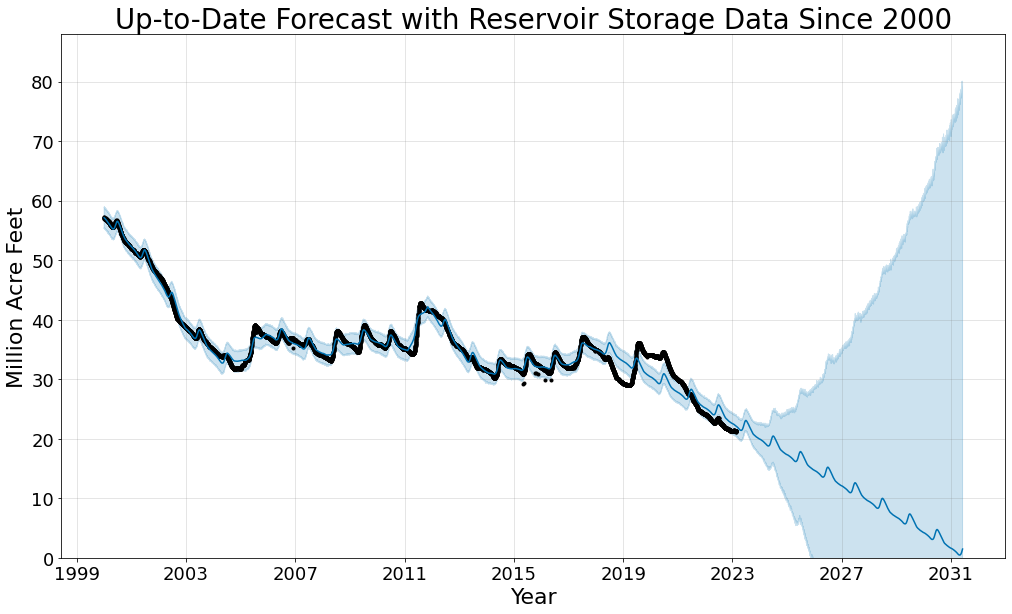

In [60]:
# This is the unmodified facebook prophet forecast using
# all reservoir data since 2000 using the latest reservoir information.

from matplotlib import pyplot as plt
%matplotlib inline
fig = n.plot(realtime_forecast, figsize=[14, 8])
plt.rcParams.update({'font.size': 23})
plt.title('Up-to-Date Forecast with Reservoir Storage Data Since 2000')
plt.ylabel('Million Acre Feet', fontsize=22)
plt.xlabel('Year', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0)
plt.savefig('./images/Up-to-Date_Reservoir_Forecast_2000_raw.png')

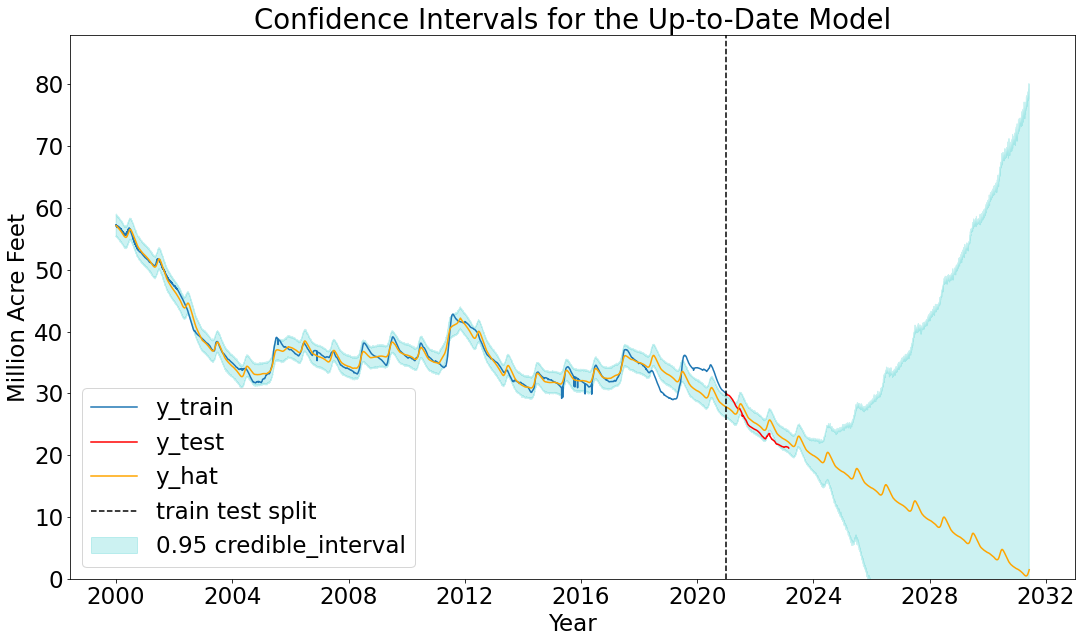

In [61]:
# This is the train-test split of the same model. The 
# cutoff was the date 01-01-2021 and everything after 
# that (represented in red) is being used to test the model.
# This line will grow longer as we get further away from when
# the model was created.  Thus far, the model is holding up,
# with the reservoir storage value hugging the lower bound of
# the forecast. 

import seaborn as sns

mask2b = realtime_forecast['ds'] < threshold_date

forecast_train2b = realtime_forecast[mask2b]
forecast_test2b = realtime_forecast[~ mask2b]

fig, ax = plt.subplots(figsize=[18, 10])

ax.fill_between(
    x=realtime_forecast['ds'],
    y1=realtime_forecast['yhat_lower'],
    y2=realtime_forecast['yhat_upper'],
    color="c", 
    alpha=0.20,
    label=r'0.95 credible_interval'
)

sns.lineplot(x='ds', y='y', label='y_train', data=df_train2, ax=ax)
sns.lineplot(x='ds', y='y', label='y_test', data=df_test2,\
ax=ax,  color = 'red')
sns.lineplot(x='ds', y='yhat', label='y_hat', data=realtime_forecast, ax=ax,\
color = "orange")
ax.axvline(threshold_date, color= "black", linestyle='--',\
label='train test split')
ax.legend(loc='lower left')
ax.set(title='Confidence Intervals for the Up-to-Date Model',\
ylabel='Million Acre Feet', xlabel = "Year")
plt.ylim(0);
plt.savefig('./images/Up-to-Date-Reservoir_Forecast_2000_train_test_split.png')

In [95]:
# This calculates the slope of the yearly decline and 
# how many years until we reach zero based off of Facebook Prophet.

year2021 = realtime_forecast[realtime_forecast['ds'] == '2021-01-01'].trend.item()

year2030 = realtime_forecast[realtime_forecast['ds'] == '2030-12-31'].trend.item()

print("2021-01-01 2000 Model: {}".format(year2021))
    
print("2030-12-31 2000 Model: {}".format(year2030))

print("Yearly Decline of the 2000 Model (in million acre-feet):{}".format((year2030 - year2021) / 10))

print("Years until zero: {}".format(latest /-2.616526302065125))


2021-01-01 2000 Model: 28.16847502299098
2030-12-31 2000 Model: 2.0032120023397297
Yearly Decline of the 2000 Model (in million acre-feet):-2.616526302065125
Years until zero: -8.085178350128984


In [63]:
# This code returns the last five values of y, which 
# represents the latest numbers for the combined reservoir
# water storage for the Coloarado River Basin.  I use this
# when reporting the latest reservoir information on Twitter.

Col_storage_uptodate_2000[['datetime', 'y']].tail()

,datetime,y
31314,2023-02-20,21.249906
31315,2023-02-21,21.224428
31316,2023-02-22,21.232772
31317,2023-02-23,21.162190
31318,2023-02-24,21.155082


In [64]:
# This calculates the r-squared and the mean absolute error of 
# train and the test portions of the model. It is a stasitcal 
# way of evaluating the model's performance.

from sklearn.metrics import r2_score, mean_absolute_error


future_uptodate = n.make_future_dataframe(periods=0) 
forecast_uptodate = n.predict(df=future_uptodate)
mask3 = forecast_uptodate['ds'] < threshold_date
forecast_test_uptodate = forecast_uptodate[~ mask3]

print('R2 of Up-to-Date test: {}'.format(r2_score(y_true=df_test2['y'],\
y_pred=forecast_test_uptodate['yhat'])))
print('---'*10)
print('Mean Absolute Error: {}'.format(mean_absolute_error\
(y_true=df_test2['y'], y_pred=forecast_test_uptodate['yhat'])))

R2 of Up-to-Date test: 0.6713235715008357
------------------------------
Mean Absolute Error: 1.4379575294508375


In [65]:
# This imports the data for reservoirs in the Colorado 
# River Basin from a Lincoln Institute of Land Policy file.

reservoir_locations = pd.read_csv('./data/Colorado_River_Basin_Reservoirs.csv')


In [66]:
# There are some name descripencies between the Lincoln Institute's file
# and the previously named reservoir columns.  This code fixes those
# discrepencies so that the two datasets can be merged.

reservoir_locations = reservoir_locations.replace({"Lake_Name" : {"Lake Havasu" : "Lake_Havasu", \
"Lake Mead" : "Lake_Mead", "Lake Mohave": "Lake_Mohave", "Lake Powell": "Lake_Powell", \
"Lake Nighthorse" : "Lake_Nighthorse", "Granby Dam" : "Granby_Reservoir" , "Heron Dam" : "Heron_Reservoir", \
"Ridgway Reservoir" : "Ridgway_Reservoir", "Navajo Reservoir" : "Navajo_Reservoir", \
"McPhee Reservoir" : "McPhee_Reservoir", "Pineview" : "Pineview_Reservoir",\
"Scofield Reservoir" : "Scofield_Reservoir", "Vallecito Lake": "Vallecito_Reservoir",\
"Blue Mesa Reservoir" : "Blue_Mesa_Reservoir", "Wilard Bay" : "Wilard_Bay_Reservoir",\
"Strawberry Reservoir": "Strawberry_Reservoir", "Morrow Point Reservoir" : "Morrow_Point_Reservoir",\
"Fontenelle Reservoir" : "Fontenelle_Reservoir", "Flaming Gorge Reservoir": "Flaming_Gorge_Reservoir",\
"Crystal Reservoir" : "Crystal_Reservoir", "Jordanelle" : "Jordanelle_Reservoir",\
"Taylor Park Reservoir" : "Taylor_Park_Reservoir", "Starvation Reservoir" : "Starvation_Reservoir"}})

In [67]:
# This code returns the data for a specific date.

latest_res = Col_storage_uptodate[Col_storage_uptodate['datetime'] == "2022-12-01"]

In [68]:
# This code changes the column names into the names of rows.

latest_res = latest_res.transpose()

In [69]:
# This resets the index so that the names of reservoirs are 
# in a column instead of being an index.

latest_res = latest_res.reset_index()

In [70]:
# This is the first five columns of the new dataset.  The storage values
# are now stored in a column by an index number (31233 in this case). 

latest_res.head()

,index,31233
0,datetime,2022-12-01
1,Lake_Mead,7178011.18
2,Lake_Havasu,566788.9
3,Lake_Mohave,1628582.8
4,Lake_Powell,5712708.17


In [71]:
# This merges the data from this notebook with data from the Lincoln 
# Institutes file.  This was primarily done to obtain longitude and latitude
# information for the reservoirs wich is useful when making Tableau visualizations.

recent_reservoir_locations = pd.merge(latest_res, reservoir_locations,\
left_on = ["index"], right_on = ["Lake_Name"], how="outer")

In [72]:
# This is the combined dataset now that the two datasets have been merged.
recent_reservoir_locations.head()

,index,31233,X,Y,FID,Longitude,Latitude,Lake_Name,Peak_Stora,Elevation,Storage_Av,Upper_Lowe,Type
0,datetime,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lake_Mead,7178011.18,-114.737733,36.016086,3.0,-114.737731,36.016087,Lake_Mead,29904000.0,1225.83,13717082.0,Lower,Storage
2,Lake_Havasu,566788.9,-114.139275,34.296429,1.0,-114.139273,34.296430,Lake_Havasu,856600.0,451.00,573216.5,Lower,Storage
3,Lake_Mohave,1628582.8,-114.569730,35.196009,2.0,-114.569732,35.196006,Lake_Mohave,1808400.0,646.95,1640061.0,Lower,Storage
4,Lake_Powell,5712708.17,-111.484242,36.937431,4.0,-111.484243,36.937427,Lake_Powell,25695200.0,3708.34,13573686.0,Upper,Storage


In [73]:
# This exports the recent reservoir data as a csv which is used by me to update
# my Tableau presentation. 

recent_reservoir_locations.to_csv('col_riv_reservoir_locations.csv')

In [74]:
# This exports an updated Facebook Prophet forecast as a csv, which again
# is used for my updated Tableau presentation. 

realtime_forecast.to_csv('col_reservoir_forecast.csv')

In [75]:
# This imports data from the USGS that is used to analyze water usage.
# Presently 2015 data is being used, but I hope to create a 2020 version 
# as soon as the USGS releases that information. I also imported county 
# data for the Colorado River basin from a Lincoln Institute file.

USGS_2015_raw_data = pd.read_csv('./data/usco2015v2.0.csv',  header= 1,\
encoding = 'unicode_escape')
Colorado_River_basin = pd.read_csv('./data/2010_Municipal_Water_Use.csv')

In [76]:
# This merges the USGS data with the Lincoln Institute file.

Col_basin_total = pd.merge(USGS_2015_raw_data, Colorado_River_basin, \
left_on=['STATEFIPS','COUNTYFIPS'], right_on = ['STATEFP','COUNTYFP'])

In [77]:
# This selects for specific columns that I want to work with so that 
# I am not having to deal with a bunch of data I have no intention of 
# using.

truncated_Col_basin= Col_basin_total[["COUNTY", "STATE", "TO-Wtotl",\
"IC-WFrTo",'IC-CUsFr', 'DO-WDelv ', "PS-Wtotl", "IG-WFrTo",\
'IG-CUsFr', "PT-Wtotl", "PT-CUTot", 'IN-Wtotl', "MI-Wtotl", \
'LI-WFrTo','AQ-Wtotl', 'TP-TotPop', 'DO-PSDel', "IR-WFrTo"]]

In [78]:
# This shows that the crop values (IC) and the golf course 
# values (IG) are mising for the state of Wyoming, but there 
# is data for irrigation overall (IR)

truncated_Col_basin[truncated_Col_basin['STATE'] == "WY"]

,COUNTY,STATE,TO-Wtotl,IC-WFrTo,IC-CUsFr,DO-WDelv,PS-Wtotl,IG-WFrTo,IG-CUsFr,PT-Wtotl,PT-CUTot,IN-Wtotl,MI-Wtotl,LI-WFrTo,AQ-Wtotl,TP-TotPop,DO-PSDel,IR-WFrTo
111,Carbon County,WY,903.64,--,--,2.50,2.85,--,--,0.00,0.00,0.75,1.62,1.05,0.73,15.559,2.34,896.48
112,Fremont County,WY,984.90,--,--,4.04,4.31,--,--,0.00,0.00,0.12,5.30,1.07,0.89,40.315,3.15,972.32
113,Laramie County,WY,190.24,--,--,12.37,14.00,--,--,0.09,0.06,1.22,0.88,1.25,0.00,97.121,10.50,170.93
114,Lincoln County,WY,494.44,--,--,3.64,4.05,--,--,7.45,5.32,0.57,0.73,0.57,0.00,18.722,3.26,480.69
115,Sublette County,WY,658.90,--,--,2.43,2.21,--,--,0.00,0.00,0.04,0.90,0.82,3.47,9.899,1.99,651.02
116,Sweetwater County,WY,151.96,--,--,8.57,11.37,--,--,19.75,14.11,1.82,6.04,0.28,0.00,44.626,8.54,112.67
117,Teton County,WY,111.52,--,--,6.17,7.78,--,--,0.00,0.00,0.19,0.00,0.06,0.65,23.125,5.93,102.60
118,Uinta County,WY,387.90,--,--,3.21,3.90,--,--,0.00,0.00,0.20,0.05,0.48,0.00,20.822,2.93,382.99


In [79]:
# This remname the USGS columns into names that are more easily understood.

truncated_Col_basin.rename(columns = {'TO-Wtotl': "Total-Withdraw", "IC-WFrTo":\
"Crop-Withdraw", "IC-CUsFr":"Crop-Consumption", "PS-Wtotl":\
"Public_Supply-Withdraw", 'DO-WDelv ':'Domestic-Withdraw', "IG-WFrTo":\
"Golf-Withdraw", 'IG-CUsFr': "Golf-Consumption", "PT-Wtotl": \
"Power-Withdraw", 'PT-CUTot': "Power-Consumption", 'IN-Wtotl':\
"Industrial_Self-Supplied_Withdraw", "MI-Wtotl":'Mining-Withdraw',\
'LI-WFrTo':"Livestock-Withdraw", "AQ-Wtotl":"Aquaculture-Withdraw",\
"DO-PSDel": "Domestic_Public-Supply_Deliveries", "IR-WFrTo": "Irrigation-Withdraw"},                           
inplace = True)

C:\Users\eincr\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [80]:
# This changes dashes into zeros so that calulations can be made.

truncated_Col_basin = truncated_Col_basin\
.apply(lambda x: x.replace('--', '0.00'))

In [81]:
# This changes columns that aren't floats into floats so that calulations
# can be made.

truncated_Col_basin[["Golf-Withdraw", "Golf-Consumption", "Crop-Withdraw",\
"Crop-Consumption", "Irrigation-Withdraw"]] = truncated_Col_basin[["Golf-Withdraw",\
"Golf-Consumption", "Crop-Withdraw","Crop-Consumption", "Irrigation-Withdraw"]].astype(float)

In [82]:
# This shows all of the Los Angeles data for the columns selected for.  

truncated_Col_basin[truncated_Col_basin["COUNTY"] == "Los Angeles County"]

,COUNTY,STATE,Total-Withdraw,Crop-Withdraw,Crop-Consumption,Domestic-Withdraw,Public_Supply-Withdraw,Golf-Withdraw,Golf-Consumption,Power-Withdraw,Power-Consumption,Industrial_Self-Supplied_Withdraw,Mining-Withdraw,Livestock-Withdraw,Aquaculture-Withdraw,TP-TotPop,Domestic_Public-Supply_Deliveries,Irrigation-Withdraw
16,Los Angeles County,CA,1940.51,17.63,13.47,820.29,1256.44,16.97,12.95,436.0,2.56,103.27,107.38,0.37,0.04,10170.292,817.88,34.6


In [83]:
# This returns the total amount of water withdrawn for Los Angeles County.  It was my
# objective to figure out how the USGS caclulated this number and the following code
# demonstrates the proof that I figured it out.  To check my work, one can simply 
# substitute Los Angeles County for another county in the Basin (though, admittedly,
# I didn't check all of them).  The total I was gunning for is 1940.51

total_withdaw = truncated_Col_basin[truncated_Col_basin["COUNTY"] == "Los Angeles County"]\
[['Total-Withdraw']].sum()
print(total_withdaw)

Total-Withdraw    1940.51
dtype: float64


In [84]:
# This sums the various withdraw columns together.  As one can see, this 
# returns a number that is signifcantly higher than the total withdraw value.

withdraw_columns = truncated_Col_basin[truncated_Col_basin\
["COUNTY"] == "Los Angeles County"][["Crop-Withdraw", "Domestic-Withdraw",\
"Public_Supply-Withdraw",'Golf-Withdraw',"Power-Withdraw",\
"Industrial_Self-Supplied_Withdraw", "Mining-Withdraw",\
"Livestock-Withdraw", "Aquaculture-Withdraw"]].sum().sum()

print(withdraw_columns)

2758.39


In [85]:
# This explains the differnce of the two numbers.  If one subtracts
# the amount of water delivered to domestic homes from the public supply,
# then one returns the total withdraw amount.  This is necesary to avoid
# double counting. 

withdraw_columns - truncated_Col_basin[truncated_Col_basin["COUNTY"]\
== "Los Angeles County"]["Domestic_Public-Supply_Deliveries"]

16    1940.51
Name: Domestic_Public-Supply_Deliveries, dtype: float64

In [86]:
# USGS data is stored in Mgal per day.  This needs to be multiplied
# by 365 to get Mgal per year.

crop_con_year = ((truncated_Col_basin[["Crop-Consumption"]].sum()) *365)
power_con_year = ((truncated_Col_basin[["Power-Consumption"]].sum()) *365)
golf_con_year = ((truncated_Col_basin[["Golf-Consumption"]].sum()) *365)
dom_draw_year = ((truncated_Col_basin[["Domestic-Withdraw"]].sum()) *365)
aqu_draw_year = ((truncated_Col_basin[["Aquaculture-Withdraw"]].sum()) *365)
ind_draw_year = ((truncated_Col_basin[["Industrial_Self-Supplied_Withdraw"]].sum()) *365)
mine_draw_year = ((truncated_Col_basin[["Mining-Withdraw"]].sum()) *365)
liv_draw_year = ((truncated_Col_basin[["Livestock-Withdraw"]].sum()) *365)

print ("Values are in Mgals per year:")
print("----------------")
print(crop_con_year)
print(power_con_year)
print(golf_con_year)
print(dom_draw_year)
print(aqu_draw_year)
print(ind_draw_year)
print(mine_draw_year)
print(liv_draw_year)

Values are in Mgals per year:
----------------
Crop-Consumption    3491549.85
dtype: float64
Power-Consumption    112197.35
dtype: float64
Golf-Consumption    97871.1
dtype: float64
Domestic-Withdraw    1617990.25
dtype: float64
Aquaculture-Withdraw    157001.1
dtype: float64
Industrial_Self-Supplied_Withdraw    138375.15
dtype: float64
Mining-Withdraw    138992.0
dtype: float64
Livestock-Withdraw    37547.55
dtype: float64


In [87]:
# This uses a function I created that converts Mgals into acre-feet which 
# was then divided by one million to return values in one million acre-feet.
# This was done so that the numbers from USGS could be comparable to the 
# estimates for reservoir decline.

print ("Values are in Million Acre-feet per year:")
print("----------------")


print(funcs.Mgal_to_acre_feet(crop_con_year) /1000000)
print(funcs.Mgal_to_acre_feet(power_con_year) /1000000)
print(funcs.Mgal_to_acre_feet(golf_con_year) /1000000)
print(funcs.Mgal_to_acre_feet(dom_draw_year) /1000000)
print(funcs.Mgal_to_acre_feet(aqu_draw_year) /1000000)
print(funcs.Mgal_to_acre_feet(ind_draw_year) /1000000)
print(funcs.Mgal_to_acre_feet(mine_draw_year) /1000000)
print(funcs.Mgal_to_acre_feet(liv_draw_year) /1000000)


Values are in Million Acre-feet per year:
----------------
Crop-Consumption    10.715097
dtype: float64
Power-Consumption    0.344319
dtype: float64
Golf-Consumption    0.300353
dtype: float64
Domestic-Withdraw    4.965394
dtype: float64
Aquaculture-Withdraw    0.481815
dtype: float64
Industrial_Self-Supplied_Withdraw    0.424655
dtype: float64
Mining-Withdraw    0.426548
dtype: float64
Livestock-Withdraw    0.115228
dtype: float64


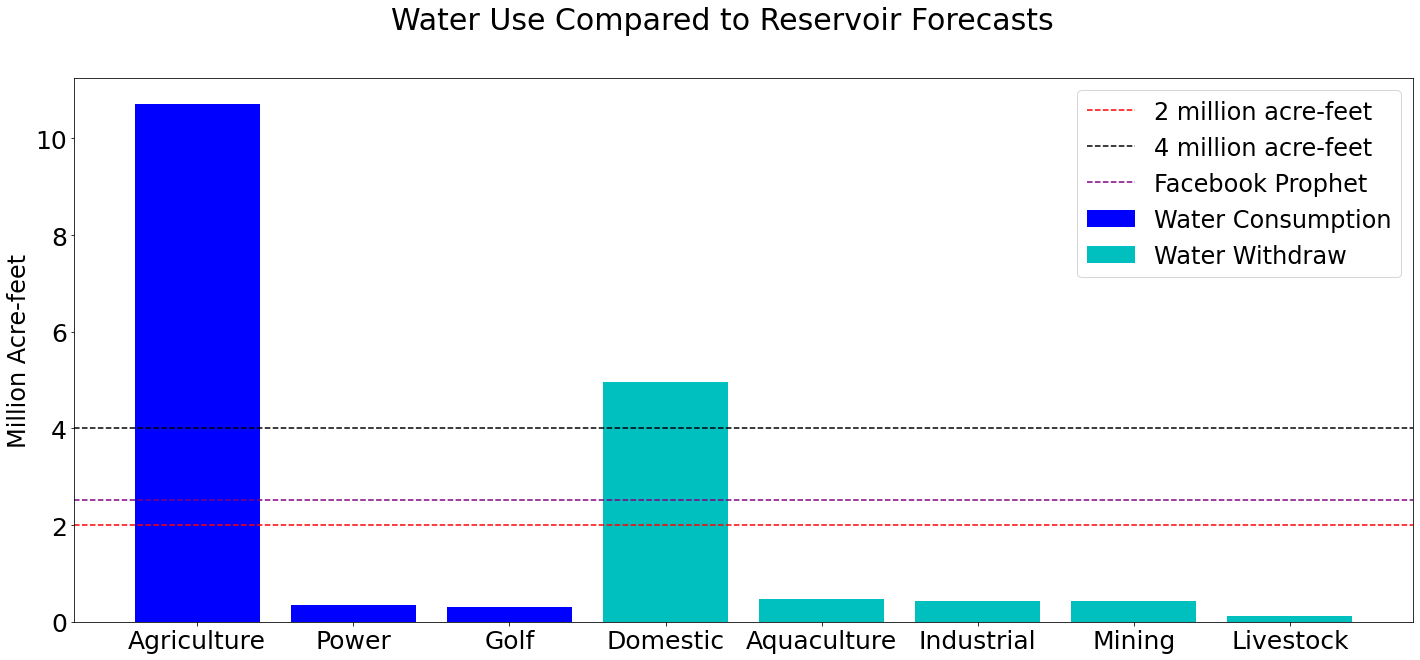

In [88]:
# This creates a plot of the various categories of water withdraw
# and consumption and compares it to the 2 to 4 million estimate form 
# USGS as well as the Facebook Prophet forecast.


plt.figure(figsize=[24,10])
plt.rcParams.update({'font.size': 25})
plt.suptitle("Water Use Compared to Reservoir Forecasts", size=30)
x = ['Agriculture', 'Power', 'Golf']
x2 =['Domestic', 'Aquaculture', 'Industrial', 'Mining', 'Livestock']
h = [10.71, 0.34, 0.30]
c = ['b', 'b', 'b']
c2 =['c', 'c', 'c', 'c', 'c'] 
h2 = [4.97, 0.48, 0.42, 0.43, 0.12]
plt.bar(x, height = h, color = c)
plt.bar(x2, height = h2, color = c2)
plt.ylabel('Million Acre-feet', fontsize=24)
plt.axhline(y= 2, color='red', linestyle='--')
plt.axhline(y= 4, color='black', linestyle='--')
plt.axhline(y= 2.53, color='purple', linestyle='--')
plt.legend(["2 million acre-feet", "4 million acre-feet",\
"Facebook Prophet",'Water Consumption',\
'Water Withdraw'], prop={'size': 24});

In [89]:
# This exports the cleaned data I created as a csv.
truncated_Col_basin.to_csv('col_basin_use.csv')